<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-II/blob/main/Serpientes_escaleras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#¿Cuál es, en promedio, el número de tiradas necesarias para terminar el juego? Considerar que cada tirada se hace con un dado ordinario.

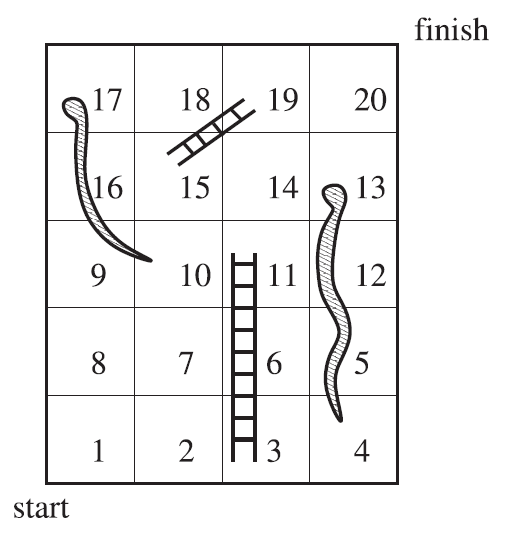

### Analiticamente
Definimos nuestra matriz de transicion:


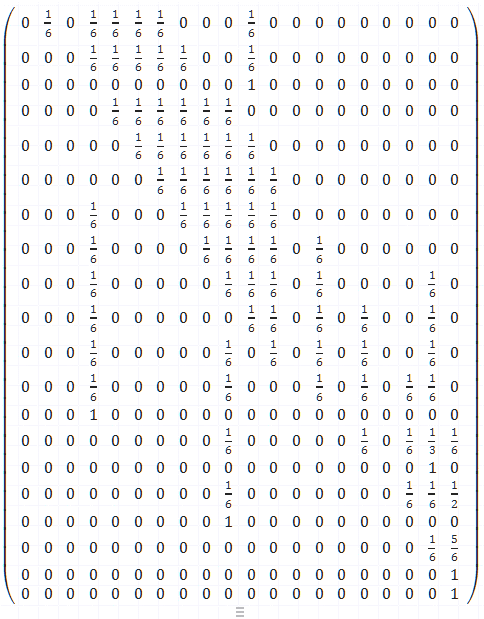



 Si hay r estados absorbentes y t transitorios la matriz de probabilidades de transicion tendra la siguiente forma canonica:

 $$
P = \begin{pmatrix}
Q & R \\
0 & I
\end{pmatrix}
$$

Donde:
$$
Q= \begin{pmatrix}
p_{11} & p_{12} & \cdots & p_{1,19} \\
p_{21} & p_{22} & \cdots & p_{2,19} \\
\vdots & \vdots & \ddots & \vdots \\
p_{19,1} & p_{19,2} & \cdots & p_{19,19}
\end{pmatrix}
$$

Notar que la matriz $Q$ tambien puede ser obtenida sin pasar por la matriz en forma canonica. Simplemente hay que eliminar de la matriz de transiciones las filas y columnas correspondientes a estados absorbentes.

Recordar que un estado $j$ se denomida absorbente si $p_{jj}=1$

Teorema: Para una cadena de Markov absorbente, la matriz $I-Q$ tiene una inversa: $N$, que se le llama matriz fundamental. La entrada $ij$ de la matriz $N$: $n_{ij}$ es el numero de veces esperado que la cadena pasa por el estado $j$, dado que empiece en el estado $i$.
Si $i = j$, el estado inicial se cuenta.

Procedemos a calcular
$$(I-Q)^{-1}=$$


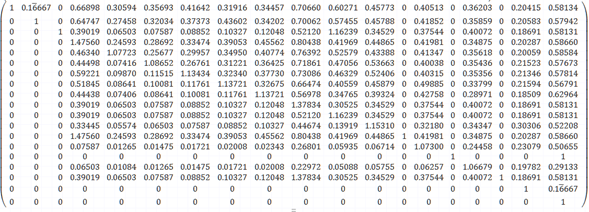

Teorema. Dada una cadena que empieza en el estado $s_i$, denotamos por $t_i$ el tiempo promedio del numero de pasos antes de que la cadena sea absorbida (i.e., el tiempo medio de absorcion de todas las posibles realizaciones de una cadena que empieza en $s_i$). $t_i$ se obtiene sumando todos los elementos de la fila $i-esima$ de la matriz fundamental del proceso.

De lo anterior se tiene que:
$$t_i = s_1+s_2+ ··· +s_{19}= 6.89836$$

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def ladders_snakes(N):
  ldd_sks={3:11,15:19,17:10,13:4}  #aqui se encuentran las escaleras y serpientes y las casillas a las que te llevan
  if N in ldd_sks: #evaluamos si hemos caido en una casilla del diccionario
    return ldd_sks[N]  #regresamos o avanzamos si es que caimos en una serpiente o escalera
  else :
    return N #de lo contrario seguimos en la misma posicion hasta el siguiente tiro

In [3]:
from os import stat
def serpientes_escaleras():

  position = 1 #posicion inicial
  tiros = 0
  status = True
  while status == True:

    d1 = rd.randint(1,6) #tiramos dado
    tiros += 1           #contamos el numero de tiros
    position = position + d1 #avanzamos el numero de posiciones segun lo que nos salio en el dado
    pst=ladders_snakes(position)  #analizamso si callo en una casilla de serpiente o escalera
    position = pst                #tomamos la posicion despues del analisis
    if position >= 20:             #evaluamos si caimos en una posicion mas alla de la casilla ganadora
      status = False             #terminamos el juego
  return tiros                  #retornamos el numero de lanzamientos de dados que hicimos para ganar el juego

In [4]:
def estimacion_tiros(N):
  tiros=[]
  for i in range(N):
    tiros.append(serpientes_escaleras())
  return sum(tiros)/N

print("k: ",estimacion_tiros(10000))

k:  6.9393


In [5]:
N=350

In [6]:
def estimacion(N):
  gs=[]
  l=[]
  for i in range(N):
    g=serpientes_escaleras()
    gs.append(g)
    suma=sum(gs)
    theta=1/(i+1)*suma #guardamos las probabilidades
    l.append(theta)


  return l

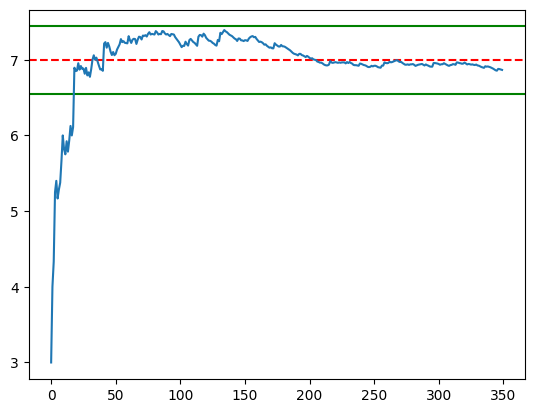

In [7]:
G=estimacion(N)

media=np.mean(G) #calculamos la media de las medias de la muestra
desv=np.std(G)   #Calculamos el error estandar de la media


plt.axhline(media,color='r',linestyle='--') #media
plt.axhline((desv+media),color='g') #limite superior del intervalo
plt.axhline((-desv+media),color='g') #limite inferior del intervalo
plt.plot(G)
plt.show()

Estimamos un intervalo de confianza del 90% y dado que $n\geq 30$:
$$\bar{x}-z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\leq x\leq \bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$

In [8]:
# Calculando el valor crítico de la distribución
p=0.90

error_estandar = desv / (N**(1/2))
valor_critico = stats.norm.ppf((1 + p) / 2)

intervalo_inferior = media - valor_critico * error_estandar
intervalo_superior = media + valor_critico * error_estandar
#Intervalo de confianza
print(f"Intervalo de confianza del {p*100}%: ({intervalo_inferior}, {intervalo_superior})")

Intervalo de confianza del 90.0%: (6.952993811669687, 7.031631302262539)


In [9]:
N=70 #tamaño de la muestra

In [10]:
def simulacion(M):
  r=[]
  for i in range(M):
    R=estimacion(N)
    r.append(R[-1])
  return r

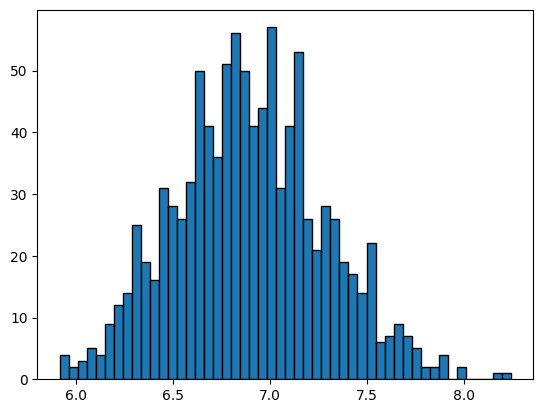

In [11]:
S=simulacion(1000)
plt.hist(S, bins=50,edgecolor="black")
plt.show()

In [12]:
MC_MediaM=np.mean(S)
print("Promedio de tiros: ",MC_MediaM)

Promedio de tiros:  6.893228571428571


In [13]:
def estimacion(N):
  exitos=[]
  for i in range(N):

    jugador1=serpientes_escaleras()  #hacemos que el jugador 1 juegue hasta ganar
    jugador2=serpientes_escaleras()  #hacemos que el jugador 2 juegue hasta ganar

    if jugador1<jugador2:  #si el numero de tiros del jugador 1 es menor al del jugador 2, gano si es que hubiesen jugado en simultaneo
      exitos.append(1)    #se registra un exito

    prob=sum(exitos)/N  #se calcula la probabilidad de ganar
  return prob

In [14]:
print(estimacion(10000))

0.4392
